<a href="https://colab.research.google.com/github/shubha07m/LLM_Dialogue_Generation/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing and importing library

In [ ]:
# Install the libraries

!pip install -U -q PyDrive

In [ ]:
# Exporting library

from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd


# Common words analysis
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Exploratory data analysis

In [ ]:
# Function to read files directly from Google Drive

def download_and_read_file_from_drive(file_id, file_name):
    """
    Downloads a file from Google Drive using the file ID and reads it into a Pandas DataFrame if it's a CSV file.

    Args:
    file_id (str): The ID of the file in Google Drive.
    file_name (str): The name to save the file as (including extension).

    Returns:
    DataFrame: A Pandas DataFrame if the file is a CSV file, otherwise None.
    """
    try:

        # Authenticate and create the PyDrive client
        auth.authenticate_user()
        gauth = GoogleAuth()
        gauth.credentials = GoogleCredentials.get_application_default()
        drive = GoogleDrive(gauth)

        # Create a GoogleDriveFile instance with the file ID
        downloaded = drive.CreateFile({'id': file_id})
        downloaded.GetContentFile(file_name)

        print(f'File {file_name} downloaded successfully.')

        # Check if the file is a CSV file and read it into a DataFrame
        if file_name.endswith('.csv'):
            df = pd.read_csv(file_name)
            print('CSV file read into DataFrame.')
            return df
        else:
            print('File is not a CSV. No DataFrame created.')
            return None

    except Exception as e:
        print(f'An error occurred: {e}')
        return None

In [ ]:
# Reading first file

file_id = '18g5y5GmBQNgU8z2fPdushrdu0XfmQjph'
file_name = 'lee_cronin3.csv'

# file_id = '15EGbylkuobQtA0zXkeHmmhhNaIxoz50D'
# file_name = 'lee_cronin3.csv'
df1 = download_and_read_file_from_drive(file_id, file_name)

if df1 is not None:
    print(df1.head())

File lee_cronin3.csv downloaded successfully.
CSV file read into DataFrame.
   Unnamed: 0      speaker                                               text
0           0   lee cronin   every star in the sky probably has planets an...
1           1  lex fridman           intersect you dont mean in time or space
2           2   lee cronin                time and the ability to communicate
3           3  lex fridman                         the ability to communicate
4           4   lee cronin   yeah my biggest fear in a way is that life is...


In [ ]:
# Reading the second file

file_id = '1Rm-ItCDv44iDqLaaEZTz-Cqu_xQPM6s5'
file_name = 'lisa_randall.csv'

# file_id = '1x3prg2ZD8h4PfOkd3Ftohyy8gtDPR3-v'
# file_name = 'lisa_randall.csv'
df2 = download_and_read_file_from_drive(file_id, file_name)

if df2 is not None:
    print(df2.head())

File lisa_randall.csv downloaded successfully.
CSV file read into DataFrame.
   Unnamed: 0       speaker                                               text
0           0   lex fridman   the following is a conversation with lisa ran...
1           1   lex fridman   this is the lex friedman podcast to support i...
2           2   lex fridman                                        dark matter
3           3   lex fridman   one of the things you work on and write about...
4           4  lisa randall   i think one of the really important things th...


In [ ]:
# Load Data
initial_data = df1
new_data =df2

In [ ]:
# Data Understanding
print(initial_data.head())
print(initial_data.info())
print(new_data.head())
print(new_data.info())

   Unnamed: 0      speaker                                               text
0           0   lee cronin   every star in the sky probably has planets an...
1           1  lex fridman           intersect you dont mean in time or space
2           2   lee cronin                time and the ability to communicate
3           3  lex fridman                         the ability to communicate
4           4   lee cronin   yeah my biggest fear in a way is that life is...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  791 non-null    int64 
 1   speaker     791 non-null    object
 2   text        791 non-null    object
dtypes: int64(1), object(2)
memory usage: 18.7+ KB
None
   Unnamed: 0       speaker                                               text
0           0   lex fridman   the following is a conversation with lisa ran...
1           1 

In [ ]:
# Check for missing values
print(initial_data.isnull().sum())
print(new_data.isnull().sum())

Unnamed: 0    0
speaker       0
text          0
dtype: int64
Unnamed: 0    0
speaker       0
text          0
dtype: int64


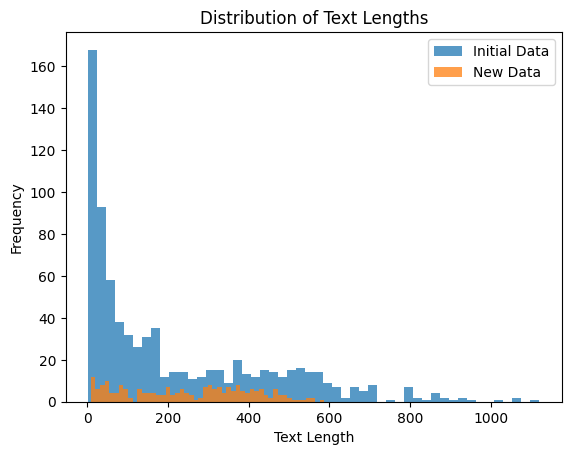

In [ ]:
# Distribution of text lengths
initial_data['text_length'] = initial_data['text'].apply(len)
new_data['text_length'] = new_data['text'].apply(len)

plt.hist(initial_data['text_length'], bins=50, alpha=0.75, label='Initial Data')
plt.hist(new_data['text_length'], bins=50, alpha=0.75, label='New Data')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.legend()
plt.show()

In [ ]:
# function for common words
def common_words(texts):
    words = ' '.join(texts).split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    word_counts = Counter(filtered_words)
    return word_counts.most_common(20)

initial_common_words = common_words(initial_data['text'])
new_common_words = common_words(new_data['text'])

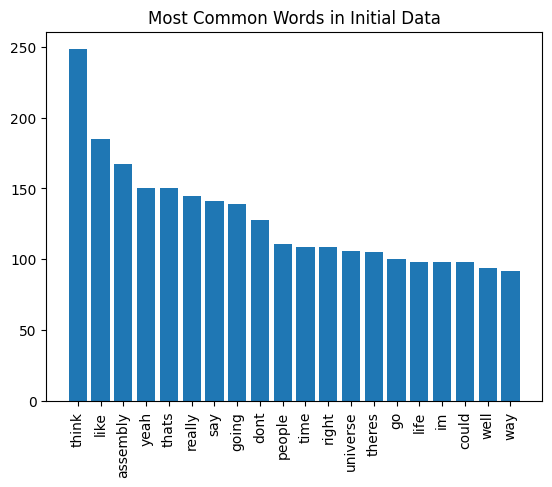

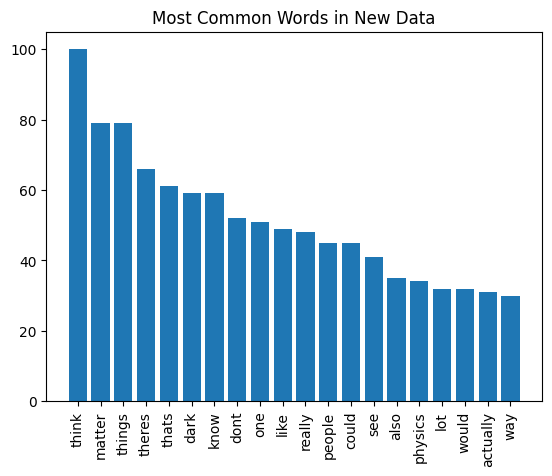

In [ ]:
# Bar plot of common words
def plot_common_words(common_words, title):
    words, counts = zip(*common_words)
    plt.bar(words, counts)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

plot_common_words(initial_common_words, 'Most Common Words in Initial Data')
plot_common_words(new_common_words, 'Most Common Words in New Data')

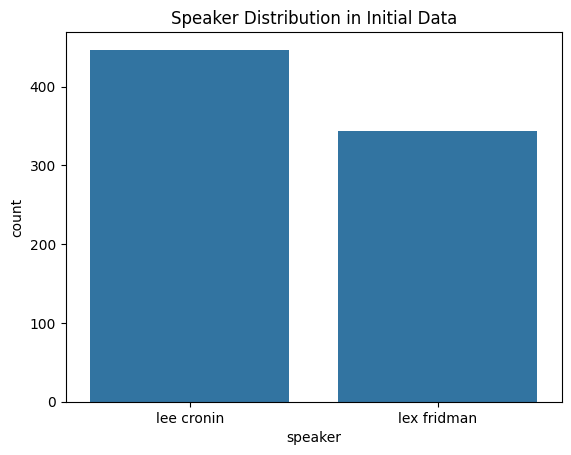

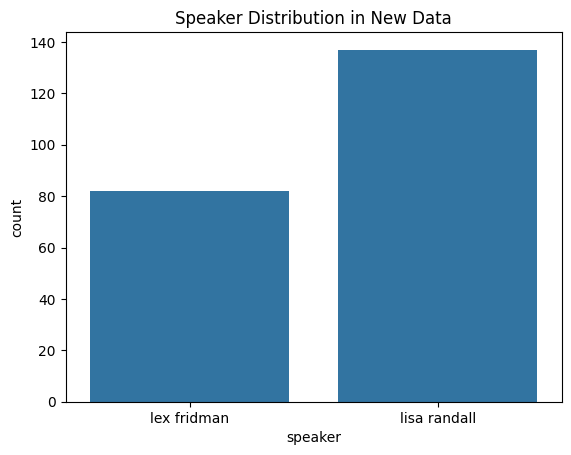

In [ ]:
# Speaker distribution
sns.countplot(x='speaker', data=initial_data)
plt.title('Speaker Distribution in Initial Data')
plt.show()

sns.countplot(x='speaker', data=new_data)
plt.title('Speaker Distribution in New Data')
plt.show()